**Learning Embedded Stochastic Approximation**

Instance: Shipment

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import copy 
import random
import time
# import the Model class from docplex.mp
from docplex.mp.model import Model

In [32]:
import utils
import sa_shipment

**Function Value Approximation**

In [4]:
# load data
shipment_data = pd.read_csv('/Users/sonny/Documents/Courses/CSCI566/experiment/training_set/shipment_sample4.csv')
# split the data file 
shipment_train, shipment_val = train_test_split(shipment_data, test_size=0.2)

In [5]:
# set up data loader 
batch_size = 40
nworkers = 4

shipment_train_data_loader = torch.utils.data.DataLoader(shipment_train.to_numpy(), batch_size=batch_size, shuffle=True, num_workers=nworkers)
shipment_val_data_loader = torch.utils.data.DataLoader(shipment_val.to_numpy(), batch_size=batch_size, shuffle=True, num_workers=nworkers)

In [4]:
import torch.nn as nn

# Neural Network Architecture 1 
# Linear, output units: 40
# ReLU 
# Linear, output units: 1

class nn_m1(nn.Module):
    def __init__(self, nz):
        super(nn_m1, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

# Neural Network Architecture 2
# Linear, output units: 40
# ReLU 
# Linear, output units: 80
# ReLU 
# Linear, output units: 40
# ReLU
# Linear, output units: 1
class nn_m2(nn.Module):
    def __init__(self, nz):
        super(nn_m2, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 80, bias=True),
            nn.ReLU(),
            nn.Linear(80, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)
    

# Neural Network Architecture 3
# Linear, output units: 128
# LeakyReLU 
# Linear, output units: 256
# LeakyReLU 
# Linear, output units: 128
# LeakyReLU
# Linear, output units: 1
class nn_m3(nn.Module):
    def __init__(self, nz):
        super(nn_m3, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 256, bias=True),
            nn.LeakyReLU(),
            nn.Linear(256, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

In [9]:
# build model 
nz = 16
shipment_model = nn_m3(nz)

# inirialize model hyperparameters 
model_parameter = {}
model_parameter['epoch'] = 30
model_parameter['learning_rate'] = 1e-4
model_parameter['output_model'] = '/Users/sonny/Documents/Courses/CSCI566/experiment2/shipment_model.pt'

Run Epoch 0
It 0, L2 training loss: 6424935.0 
It 0, L2 validation loss: 6079787.5 
It 50, L2 training loss: 4028568.0 
It 50, L2 validation loss: 6026885.0 
It 100, L2 training loss: 3522398.0 
It 100, L2 validation loss: 5819044.0 
It 150, L2 training loss: 3440765.5 
It 150, L2 validation loss: 5231843.5 
Run Epoch 1
It 200, L2 training loss: 3192498.5 
It 200, L2 validation loss: 4398983.5 
It 250, L2 training loss: 2634244.5 
It 250, L2 validation loss: 4055057.0 
It 300, L2 training loss: 2162543.0 
It 300, L2 validation loss: 3923027.5 
It 350, L2 training loss: 4463630.5 
It 350, L2 validation loss: 3788350.25 
Run Epoch 2
It 400, L2 training loss: 2653244.5 
It 400, L2 validation loss: 3630879.75 
It 450, L2 training loss: 2617220.5 
It 450, L2 validation loss: 3471442.0 
It 500, L2 training loss: 4749611.5 
It 500, L2 validation loss: 3288423.75 
It 550, L2 training loss: 2685724.0 
It 550, L2 validation loss: 3067453.0 
Run Epoch 3
It 600, L2 training loss: 2127661.75 
It 60

It 4650, L2 training loss: 6882.7783203125 
It 4650, L2 validation loss: 6513.15576171875 
It 4700, L2 training loss: 4630.7626953125 
It 4700, L2 validation loss: 6320.7900390625 
It 4750, L2 training loss: 6314.76708984375 
It 4750, L2 validation loss: 6250.2939453125 
Run Epoch 24
It 4800, L2 training loss: 5504.04296875 
It 4800, L2 validation loss: 6199.90576171875 
It 4850, L2 training loss: 5454.2001953125 
It 4850, L2 validation loss: 6217.15380859375 
It 4900, L2 training loss: 2061.07958984375 
It 4900, L2 validation loss: 6406.28857421875 
It 4950, L2 training loss: 4259.0283203125 
It 4950, L2 validation loss: 6309.166015625 
Run Epoch 25
It 5000, L2 training loss: 4137.818359375 
It 5000, L2 validation loss: 6057.0546875 
It 5050, L2 training loss: 4069.72314453125 
It 5050, L2 validation loss: 6155.099609375 
It 5100, L2 training loss: 4381.9970703125 
It 5100, L2 validation loss: 6005.28662109375 
It 5150, L2 training loss: 6067.42724609375 
It 5150, L2 validation loss: 

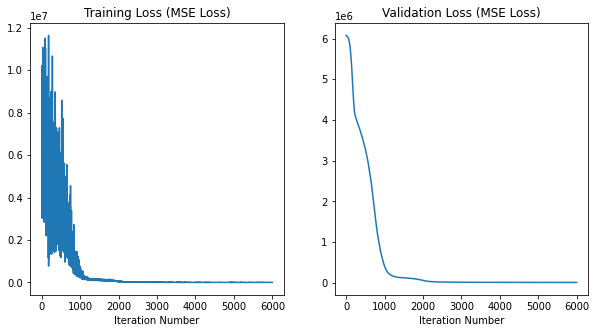

Model has been saved.


In [10]:
# train the model 
utils.normal_train(model_parameter, shipment_model, shipment_train_data_loader, shipment_val.to_numpy())

Load the model

In [5]:
# load model 
nz = 16
model_path_shipment = '/Users/sonny/Documents/Courses/CSCI566/experiment2/shipment_model.pt' 
nn_shipment_model_load = nn_m3(nz)
nn_shipment_model_load.load_state_dict(torch.load(model_path_shipment))
nn_shipment_model_load.eval()

nn_m3(
  (net): Sequential(
    (0): Linear(in_features=16, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

**LESA versus SA**

In [6]:
# test on benchmark_sample2tensor_shipment
benchmark_sample_set_shipment = sa_shipment.benchmark_sample2tensor_shipment(1000)

In [27]:
# test on directional directive
x = np.zeros(4)
d = np.ones(4) * 95
x_proj = sa_shipment.projection_shipment(x)
directional_directive = sa_shipment.directional_directive_shipment(x_proj, d, benchmark_sample_set_shipment, nn_shipment_model_load)
print('x_proj')
print(x_proj)
print('d')
print(d)
print('Estimated Directional Directive is: {}'.format(directional_directive))

# test on approximate Armijo rule 
stepsize = sa_shipment.backtrack_line_search_shipment(x_proj, d, benchmark_sample_set_shipment, nn_shipment_model_load)
print(stepsize)

x_proj
[4.85797319e-05 4.85797319e-05 4.85797319e-05 4.85797319e-05]
d
[95. 95. 95. 95.]
Estimated Directional Directive is: -24817.380859375
directional_directive: -24817.380859375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2371.19921875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 10675.880859375
1.0


**random seed = 123 (default)**

In [7]:
# test on vanilla LESA
x = np.zeros(4)
x_proj = sa_shipment.projection_shipment(x)
print('x_proj')
print(x_proj)
x_est_lesa_shipment, x_record_lesa_shipment = sa_shipment.lesa_shipment(x_proj, nn_shipment_model_load, dataset=benchmark_sample_set_shipment)

x_proj
[4.85797319e-05 4.85797319e-05 4.85797319e-05 4.85797319e-05]
************************************
Vanilla LESA Shipment
************************************
it: 1
Omega:
[0.0, 0.0, 8.0, 2.0, 18.0, 0.0, 10.0, 6.0, 16.0, 2.0, 6.0, 6.0]
subgradient:
[-95. -95. -95. -95.]
Using backtrack line search
directional_directive: -24864.255859375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2370.5234375
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 10629.88671875
Stepsize: 1.0
Before projection
[95.00004858 95.00004858 95.00004858 95.00004858]
After projection
[95.00004904 95.00004904 95.00004904 95.00004904]
it: 2
Omega:
[4.0, 0.0, 8.0, 0.0, 10.0, 0.0, 6.0, 8.0, 18.0, 0.0, 2.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Using backtrack line search
directional_directive: -114.74608612060547
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2255.85107421875
Debug Mode(bac

[68.67801933 68.67801933 68.67801933 68.67801933]
it: 20
Omega:
[0.0, 12.0, 14.0, 8.0, 0.0, 18.0, 2.0, 16.0, 16.0, 4.0, 16.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.05
Before projection
[68.42801933 68.42801933 68.42801933 68.42801933]
After projection
[68.42801938 68.42801938 68.42801938 68.42801938]
it: 21
Omega:
[16.0, 16.0, 14.0, 4.0, 10.0, 18.0, 6.0, 6.0, 12.0, 0.0, 4.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.047619047619047616
Before projection
[68.18992414 68.18992414 68.18992414 68.18992414]
After projection
[68.1899242 68.1899242 68.1899242 68.1899242]
it: 22
Omega:
[8.0, 8.0, 12.0, 8.0, 2.0, 0.0, 10.0, 14.0, 18.0, 16.0, 6.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.045454545454545456
Before projection
[67.96265147 67.96265147 67.96265147 67.96265147]
After projection
[67.96265152 67.96265152 67.96265152 67.96265152]
it: 23
Omega:
[8.0, 4.0, 0.0, 8.0, 10.0, 4.0, 2.0, 1

[64.90205215 64.90205215 64.90205215 64.90205215]
it: 42
Omega:
[18.0, 16.0, 0.0, 0.0, 10.0, 6.0, 0.0, 12.0, 2.0, 12.0, 0.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.023809523809523808
Before projection
[64.78300453 64.78300453 64.78300453 64.78300453]
After projection
[64.78300456 64.78300456 64.78300456 64.78300456]
it: 43
Omega:
[16.0, 14.0, 16.0, 12.0, 6.0, 2.0, 12.0, 18.0, 12.0, 2.0, 0.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.023255813953488372
Before projection
[64.66672549 64.66672549 64.66672549 64.66672549]
After projection
[64.66672553 64.66672553 64.66672553 64.66672553]
it: 44
Omega:
[16.0, 2.0, 14.0, 10.0, 6.0, 8.0, 4.0, 8.0, 2.0, 10.0, 12.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.022727272727272728
Before projection
[64.55308916 64.55308916 64.55308916 64.55308916]
After projection
[64.5530892 64.5530892 64.5530892 64.5530892]
it: 45
Omega:
[18.0, 18.0, 16.0, 12

[62.7753897 62.7753897 62.7753897 62.7753897]
it: 64
Omega:
[12.0, 2.0, 0.0, 4.0, 6.0, 0.0, 18.0, 8.0, 0.0, 10.0, 0.0, 12.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015625
Before projection
[62.6972647 62.6972647 62.6972647 62.6972647]
After projection
[62.69726472 62.69726472 62.69726472 62.69726472]
it: 65
Omega:
[12.0, 8.0, 2.0, 12.0, 2.0, 14.0, 10.0, 14.0, 18.0, 12.0, 6.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015384615384615385
Before projection
[62.62034164 62.62034164 62.62034164 62.62034164]
After projection
[62.62034167 62.62034167 62.62034167 62.62034167]
it: 66
Omega:
[12.0, 18.0, 2.0, 4.0, 14.0, 14.0, 10.0, 18.0, 10.0, 18.0, 2.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015151515151515152
Before projection
[62.54458409 62.54458409 62.54458409 62.54458409]
After projection
[62.54458412 62.54458412 62.54458412 62.54458412]
it: 67
Omega:
[4.0, 16.0, 2.0, 6.0, 2.0, 0.0, 14.0

[61.28803101 61.28803101 61.28803101 61.28803101]
it: 86
Omega:
[8.0, 6.0, 6.0, 14.0, 10.0, 0.0, 14.0, 12.0, 14.0, 18.0, 14.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011627906976744186
Before projection
[61.22989148 61.22989148 61.22989148 61.22989148]
After projection
[61.2298915 61.2298915 61.2298915 61.2298915]
it: 87
Omega:
[0.0, 18.0, 0.0, 0.0, 14.0, 0.0, 6.0, 2.0, 4.0, 2.0, 4.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011494252873563218
Before projection
[61.17242024 61.17242024 61.17242024 61.17242024]
After projection
[61.17242026 61.17242026 61.17242026 61.17242026]
it: 88
Omega:
[0.0, 4.0, 6.0, 2.0, 2.0, 18.0, 14.0, 10.0, 12.0, 4.0, 8.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011363636363636364
Before projection
[61.11560207 61.11560207 61.11560207 61.11560207]
After projection
[61.11560209 61.11560209 61.11560209 61.11560209]
it: 89
Omega:
[12.0, 6.0, 16.0, 16.0, 2.0

In [9]:
# test on SA 
x_est_sa_shipment, x_record_sa_shipment = sa_shipment.sa_shipment(x_init=x_proj)

************************************
Vanilla SA Shipment
************************************
it: 1
Omega:
[0.0, 0.0, 8.0, 2.0, 18.0, 0.0, 10.0, 6.0, 16.0, 2.0, 6.0, 6.0]
subgradient:
[-95. -95. -95. -95.]
Stepsize: 1.0
Before projection
[95.00004858 95.00004858 95.00004858 95.00004858]
After projection
[95.00004904 95.00004904 95.00004904 95.00004904]
it: 2
Omega:
[4.0, 0.0, 8.0, 0.0, 10.0, 0.0, 6.0, 8.0, 18.0, 0.0, 2.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.5
Before projection
[92.50004904 92.50004904 92.50004904 92.50004904]
After projection
[92.50004945 92.50004945 92.50004945 92.50004945]
it: 3
Omega:
[0.0, 18.0, 10.0, 4.0, 16.0, 14.0, 6.0, 16.0, 4.0, 12.0, 10.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.3333333333333333
Before projection
[90.83338278 90.83338278 90.83338278 90.83338278]
After projection
[90.83338314 90.83338314 90.83338314 90.83338314]
it: 4
Omega:
[6.0, 6.0, 14.0, 10.0, 12.0, 12.0, 12.0, 16.0, 8.0, 12.0, 6.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0

[81.1202639 81.1202639 81.1202639 81.1202639]
it: 25
Omega:
[18.0, 0.0, 12.0, 10.0, 0.0, 18.0, 14.0, 16.0, 8.0, 4.0, 2.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.04
Before projection
[80.9202639 80.9202639 80.9202639 80.9202639]
After projection
[80.92026409 80.92026409 80.92026409 80.92026409]
it: 26
Omega:
[12.0, 16.0, 4.0, 0.0, 6.0, 2.0, 4.0, 4.0, 12.0, 8.0, 10.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.038461538461538464
Before projection
[80.72795639 80.72795639 80.72795639 80.72795639]
After projection
[80.72795657 80.72795657 80.72795657 80.72795657]
it: 27
Omega:
[18.0, 8.0, 0.0, 2.0, 14.0, 18.0, 2.0, 8.0, 16.0, 10.0, 0.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.037037037037037035
Before projection
[80.54277139 80.54277139 80.54277139 80.54277139]
After projection
[80.54277157 80.54277157 80.54277157 80.54277157]
it: 28
Omega:
[4.0, 4.0, 18.0, 2.0, 16.0, 14.0, 10.0, 6.0, 0.0, 12.0, 18.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.03571428571428571
Before projectio

[77.70607272 77.70607272 77.70607272 77.70607272]
it: 49
Omega:
[14.0, 18.0, 6.0, 8.0, 4.0, 14.0, 16.0, 12.0, 14.0, 2.0, 18.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.02040816326530612
Before projection
[77.6040319 77.6040319 77.6040319 77.6040319]
After projection
[77.60403204 77.60403204 77.60403204 77.60403204]
it: 50
Omega:
[16.0, 2.0, 12.0, 14.0, 2.0, 10.0, 4.0, 18.0, 2.0, 18.0, 10.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.02
Before projection
[77.50403204 77.50403204 77.50403204 77.50403204]
After projection
[77.50403218 77.50403218 77.50403218 77.50403218]
it: 51
Omega:
[2.0, 6.0, 12.0, 12.0, 4.0, 8.0, 16.0, 8.0, 6.0, 12.0, 16.0, 12.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.0196078431372549
Before projection
[77.40599296 77.40599296 77.40599296 77.40599296]
After projection
[77.4059931 77.4059931 77.4059931 77.4059931]
it: 52
Omega:
[18.0, 8.0, 0.0, 0.0, 18.0, 6.0, 14.0, 18.0, 10.0, 12.0, 10.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.019230769230769232
Before proje

[75.69601087 75.69601087 75.69601087 75.69601087]
it: 73
Omega:
[12.0, 0.0, 18.0, 18.0, 4.0, 10.0, 2.0, 10.0, 8.0, 14.0, 6.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.0136986301369863
Before projection
[75.62751772 75.62751772 75.62751772 75.62751772]
After projection
[75.62751783 75.62751783 75.62751783 75.62751783]
it: 74
Omega:
[12.0, 6.0, 18.0, 0.0, 0.0, 2.0, 4.0, 8.0, 12.0, 12.0, 2.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013513513513513514
Before projection
[75.55995026 75.55995026 75.55995026 75.55995026]
After projection
[75.55995038 75.55995038 75.55995038 75.55995038]
it: 75
Omega:
[2.0, 4.0, 8.0, 8.0, 6.0, 8.0, 18.0, 12.0, 6.0, 2.0, 4.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013333333333333334
Before projection
[75.49328371 75.49328371 75.49328371 75.49328371]
After projection
[75.49328383 75.49328383 75.49328383 75.49328383]
it: 76
Omega:
[18.0, 6.0, 0.0, 6.0, 18.0, 4.0, 14.0, 10.0, 8.0, 0.0, 4.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013157894736842

[74.2662485 74.2662485 74.2662485 74.2662485]
it: 97
Omega:
[4.0, 16.0, 10.0, 14.0, 14.0, 2.0, 12.0, 2.0, 16.0, 2.0, 12.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.010309278350515464
Before projection
[74.21470211 74.21470211 74.21470211 74.21470211]
After projection
[74.21470221 74.21470221 74.21470221 74.21470221]
it: 98
Omega:
[18.0, 16.0, 4.0, 16.0, 0.0, 12.0, 16.0, 18.0, 6.0, 6.0, 12.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01020408163265306
Before projection
[74.1636818 74.1636818 74.1636818 74.1636818]
After projection
[74.1636819 74.1636819 74.1636819 74.1636819]
it: 99
Omega:
[4.0, 18.0, 10.0, 0.0, 10.0, 6.0, 14.0, 12.0, 4.0, 16.0, 4.0, 12.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.010101010101010102
Before projection
[74.11317685 74.11317685 74.11317685 74.11317685]
After projection
[74.11317695 74.11317695 74.11317695 74.11317695]
it: 100
Omega:
[4.0, 0.0, 4.0, 12.0, 10.0, 12.0, 2.0, 2.0, 0.0, 6.0, 4.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01
Before projectio

In [11]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/x_record_lesa_shipment.txt'
utils.save_solution(x_record_lesa_shipment, path)

In [13]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/x_record_sa_shipment.txt'
utils.save_solution(x_record_sa_shipment, path)

**random seed = 5**

In [24]:
# test on vanilla LESA
x = np.zeros(4)
x_proj = sa_shipment.projection_shipment(x)
print('x_proj')
print(x_proj)
x_est_lesa_shipment, x_record_lesa_shipment = sa_shipment.lesa_shipment(x_proj, nn_shipment_model_load, dataset=benchmark_sample_set_shipment, _seed=5)

x_proj
[4.85797319e-05 4.85797319e-05 4.85797319e-05 4.85797319e-05]
************************************
Vanilla LESA Shipment
************************************
it: 1
Omega:
[12.0, 14.0, 14.0, 18.0, 14.0, 18.0, 0.0, 8.0, 18.0, 12.0, 18.0, 2.0]
subgradient:
[-95. -95. -95. -95.]
Using backtrack line search
directional_directive: -24864.255859375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2370.5234375
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 10629.88671875
Stepsize: 1.0
Before projection
[95.00004858 95.00004858 95.00004858 95.00004858]
After projection
[95.00004904 95.00004904 95.00004904 95.00004904]
it: 2
Omega:
[8.0, 4.0, 10.0, 10.0, 0.0, 4.0, 4.0, 18.0, 14.0, 2.0, 14.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Using backtrack line search
directional_directive: -114.74608612060547
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2255.85107421875
Debug 

[68.67801933 68.67801933 68.67801933 68.67801933]
it: 20
Omega:
[10.0, 6.0, 10.0, 18.0, 16.0, 8.0, 16.0, 12.0, 6.0, 2.0, 10.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.05
Before projection
[68.42801933 68.42801933 68.42801933 68.42801933]
After projection
[68.42801938 68.42801938 68.42801938 68.42801938]
it: 21
Omega:
[18.0, 18.0, 12.0, 6.0, 16.0, 0.0, 2.0, 10.0, 12.0, 2.0, 12.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.047619047619047616
Before projection
[68.18992414 68.18992414 68.18992414 68.18992414]
After projection
[68.1899242 68.1899242 68.1899242 68.1899242]
it: 22
Omega:
[6.0, 8.0, 4.0, 4.0, 18.0, 6.0, 18.0, 18.0, 10.0, 4.0, 18.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.045454545454545456
Before projection
[67.96265147 67.96265147 67.96265147 67.96265147]
After projection
[67.96265152 67.96265152 67.96265152 67.96265152]
it: 23
Omega:
[8.0, 6.0, 18.0, 8.0, 4.0, 8.0, 2.0

[64.90205215 64.90205215 64.90205215 64.90205215]
it: 42
Omega:
[12.0, 8.0, 18.0, 0.0, 0.0, 14.0, 8.0, 0.0, 10.0, 18.0, 10.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.023809523809523808
Before projection
[64.78300453 64.78300453 64.78300453 64.78300453]
After projection
[64.78300456 64.78300456 64.78300456 64.78300456]
it: 43
Omega:
[0.0, 0.0, 16.0, 8.0, 18.0, 0.0, 4.0, 0.0, 6.0, 0.0, 4.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.023255813953488372
Before projection
[64.66672549 64.66672549 64.66672549 64.66672549]
After projection
[64.66672553 64.66672553 64.66672553 64.66672553]
it: 44
Omega:
[6.0, 0.0, 0.0, 18.0, 2.0, 10.0, 8.0, 10.0, 0.0, 6.0, 2.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.022727272727272728
Before projection
[64.55308916 64.55308916 64.55308916 64.55308916]
After projection
[64.5530892 64.5530892 64.5530892 64.5530892]
it: 45
Omega:
[18.0, 10.0, 16.0, 4.0, 0.0,

[62.7753897 62.7753897 62.7753897 62.7753897]
it: 64
Omega:
[10.0, 12.0, 12.0, 14.0, 0.0, 8.0, 16.0, 18.0, 6.0, 16.0, 12.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015625
Before projection
[62.6972647 62.6972647 62.6972647 62.6972647]
After projection
[62.69726472 62.69726472 62.69726472 62.69726472]
it: 65
Omega:
[4.0, 12.0, 16.0, 8.0, 2.0, 2.0, 2.0, 0.0, 2.0, 12.0, 2.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015384615384615385
Before projection
[62.62034164 62.62034164 62.62034164 62.62034164]
After projection
[62.62034167 62.62034167 62.62034167 62.62034167]
it: 66
Omega:
[14.0, 16.0, 16.0, 14.0, 18.0, 18.0, 12.0, 18.0, 2.0, 2.0, 0.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015151515151515152
Before projection
[62.54458409 62.54458409 62.54458409 62.54458409]
After projection
[62.54458412 62.54458412 62.54458412 62.54458412]
it: 67
Omega:
[6.0, 8.0, 12.0, 14.0, 0.0, 8.0, 10

[61.28803101 61.28803101 61.28803101 61.28803101]
it: 86
Omega:
[16.0, 2.0, 14.0, 4.0, 4.0, 0.0, 14.0, 10.0, 18.0, 8.0, 2.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011627906976744186
Before projection
[61.22989148 61.22989148 61.22989148 61.22989148]
After projection
[61.2298915 61.2298915 61.2298915 61.2298915]
it: 87
Omega:
[4.0, 18.0, 4.0, 0.0, 6.0, 0.0, 8.0, 12.0, 12.0, 2.0, 2.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011494252873563218
Before projection
[61.17242024 61.17242024 61.17242024 61.17242024]
After projection
[61.17242026 61.17242026 61.17242026 61.17242026]
it: 88
Omega:
[12.0, 8.0, 10.0, 18.0, 2.0, 4.0, 8.0, 10.0, 18.0, 10.0, 12.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011363636363636364
Before projection
[61.11560207 61.11560207 61.11560207 61.11560207]
After projection
[61.11560209 61.11560209 61.11560209 61.11560209]
it: 89
Omega:
[14.0, 16.0, 4.0, 2.0, 4.

In [25]:
# test on SA 
x_est_sa_shipment, x_record_sa_shipment = sa_shipment.sa_shipment(x_init=x_proj, _seed=5)

************************************
Vanilla SA Shipment
************************************
it: 1
Omega:
[12.0, 14.0, 14.0, 18.0, 14.0, 18.0, 0.0, 8.0, 18.0, 12.0, 18.0, 2.0]
subgradient:
[-95. -95. -95. -95.]
Stepsize: 1.0
Before projection
[95.00004858 95.00004858 95.00004858 95.00004858]
After projection
[95.00004904 95.00004904 95.00004904 95.00004904]
it: 2
Omega:
[8.0, 4.0, 10.0, 10.0, 0.0, 4.0, 4.0, 18.0, 14.0, 2.0, 14.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.5
Before projection
[92.50004904 92.50004904 92.50004904 92.50004904]
After projection
[92.50004945 92.50004945 92.50004945 92.50004945]
it: 3
Omega:
[12.0, 2.0, 0.0, 16.0, 4.0, 4.0, 18.0, 16.0, 4.0, 18.0, 10.0, 12.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.3333333333333333
Before projection
[90.83338278 90.83338278 90.83338278 90.83338278]
After projection
[90.83338314 90.83338314 90.83338314 90.83338314]
it: 4
Omega:
[4.0, 18.0, 12.0, 18.0, 16.0, 4.0, 6.0, 2.0, 2.0, 0.0, 6.0, 12.0]
subgradient:
[5. 5. 5. 5.]
Stepsi

[81.1202639 81.1202639 81.1202639 81.1202639]
it: 25
Omega:
[12.0, 12.0, 14.0, 2.0, 14.0, 6.0, 10.0, 6.0, 4.0, 10.0, 8.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.04
Before projection
[80.9202639 80.9202639 80.9202639 80.9202639]
After projection
[80.92026409 80.92026409 80.92026409 80.92026409]
it: 26
Omega:
[14.0, 10.0, 0.0, 4.0, 8.0, 18.0, 16.0, 10.0, 0.0, 14.0, 8.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.038461538461538464
Before projection
[80.72795639 80.72795639 80.72795639 80.72795639]
After projection
[80.72795657 80.72795657 80.72795657 80.72795657]
it: 27
Omega:
[14.0, 12.0, 8.0, 18.0, 6.0, 6.0, 16.0, 2.0, 4.0, 16.0, 0.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.037037037037037035
Before projection
[80.54277139 80.54277139 80.54277139 80.54277139]
After projection
[80.54277157 80.54277157 80.54277157 80.54277157]
it: 28
Omega:
[12.0, 8.0, 4.0, 14.0, 18.0, 2.0, 8.0, 10.0, 8.0, 6.0, 2.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.03571428571428571
Before project

[77.70607272 77.70607272 77.70607272 77.70607272]
it: 49
Omega:
[14.0, 14.0, 4.0, 16.0, 6.0, 2.0, 0.0, 2.0, 4.0, 12.0, 4.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.02040816326530612
Before projection
[77.6040319 77.6040319 77.6040319 77.6040319]
After projection
[77.60403204 77.60403204 77.60403204 77.60403204]
it: 50
Omega:
[14.0, 10.0, 0.0, 0.0, 2.0, 6.0, 16.0, 18.0, 12.0, 4.0, 8.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.02
Before projection
[77.50403204 77.50403204 77.50403204 77.50403204]
After projection
[77.50403218 77.50403218 77.50403218 77.50403218]
it: 51
Omega:
[6.0, 0.0, 10.0, 16.0, 14.0, 0.0, 10.0, 2.0, 14.0, 8.0, 18.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.0196078431372549
Before projection
[77.40599296 77.40599296 77.40599296 77.40599296]
After projection
[77.4059931 77.4059931 77.4059931 77.4059931]
it: 52
Omega:
[2.0, 6.0, 18.0, 8.0, 8.0, 8.0, 14.0, 18.0, 10.0, 18.0, 10.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.019230769230769232
Before projection


[75.69601087 75.69601087 75.69601087 75.69601087]
it: 73
Omega:
[18.0, 12.0, 12.0, 0.0, 0.0, 14.0, 8.0, 16.0, 16.0, 18.0, 6.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.0136986301369863
Before projection
[75.62751772 75.62751772 75.62751772 75.62751772]
After projection
[75.62751783 75.62751783 75.62751783 75.62751783]
it: 74
Omega:
[14.0, 16.0, 2.0, 14.0, 8.0, 18.0, 18.0, 4.0, 8.0, 4.0, 8.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013513513513513514
Before projection
[75.55995026 75.55995026 75.55995026 75.55995026]
After projection
[75.55995038 75.55995038 75.55995038 75.55995038]
it: 75
Omega:
[12.0, 2.0, 2.0, 8.0, 0.0, 6.0, 16.0, 16.0, 2.0, 0.0, 16.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013333333333333334
Before projection
[75.49328371 75.49328371 75.49328371 75.49328371]
After projection
[75.49328383 75.49328383 75.49328383 75.49328383]
it: 76
Omega:
[10.0, 2.0, 4.0, 18.0, 18.0, 0.0, 2.0, 8.0, 4.0, 14.0, 6.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01315789473

[74.2662485 74.2662485 74.2662485 74.2662485]
it: 97
Omega:
[2.0, 12.0, 2.0, 10.0, 4.0, 6.0, 0.0, 14.0, 2.0, 14.0, 6.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.010309278350515464
Before projection
[74.21470211 74.21470211 74.21470211 74.21470211]
After projection
[74.21470221 74.21470221 74.21470221 74.21470221]
it: 98
Omega:
[12.0, 8.0, 16.0, 18.0, 4.0, 6.0, 16.0, 2.0, 8.0, 8.0, 18.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01020408163265306
Before projection
[74.1636818 74.1636818 74.1636818 74.1636818]
After projection
[74.1636819 74.1636819 74.1636819 74.1636819]
it: 99
Omega:
[12.0, 14.0, 14.0, 0.0, 18.0, 6.0, 16.0, 12.0, 8.0, 16.0, 12.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.010101010101010102
Before projection
[74.11317685 74.11317685 74.11317685 74.11317685]
After projection
[74.11317695 74.11317695 74.11317695 74.11317695]
it: 100
Omega:
[14.0, 10.0, 14.0, 12.0, 14.0, 2.0, 8.0, 0.0, 14.0, 14.0, 16.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01
Before projecti

In [26]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_lesa_shipment.txt'
utils.save_solution(x_record_lesa_shipment, path)

In [27]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_sa_shipment.txt'
utils.save_solution(x_record_sa_shipment, path)

**random seed = 37**

In [28]:
# test on vanilla LESA
x = np.zeros(4)
x_proj = sa_shipment.projection_shipment(x)
print('x_proj')
print(x_proj)
x_est_lesa_shipment, x_record_lesa_shipment = sa_shipment.lesa_shipment(x_proj, nn_shipment_model_load, dataset=benchmark_sample_set_shipment, _seed=37)

x_proj
[4.85797319e-05 4.85797319e-05 4.85797319e-05 4.85797319e-05]
************************************
Vanilla LESA Shipment
************************************
it: 1
Omega:
[12.0, 0.0, 12.0, 16.0, 16.0, 10.0, 12.0, 6.0, 10.0, 2.0, 12.0, 12.0]
subgradient:
[-95. -95. -95. -95.]
Using backtrack line search
directional_directive: -24864.255859375
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2370.5234375
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 10629.88671875
Stepsize: 1.0
Before projection
[95.00004858 95.00004858 95.00004858 95.00004858]
After projection
[95.00004904 95.00004904 95.00004904 95.00004904]
it: 2
Omega:
[4.0, 6.0, 14.0, 8.0, 18.0, 18.0, 16.0, 0.0, 0.0, 4.0, 6.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Using backtrack line search
directional_directive: -114.74608612060547
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 2255.85107421875
Debug 

[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.05263157894736842
Before projection
[68.67801927 68.67801927 68.67801927 68.67801927]
After projection
[68.67801933 68.67801933 68.67801933 68.67801933]
it: 20
Omega:
[4.0, 2.0, 16.0, 16.0, 16.0, 12.0, 0.0, 4.0, 16.0, 0.0, 8.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.05
Before projection
[68.42801933 68.42801933 68.42801933 68.42801933]
After projection
[68.42801938 68.42801938 68.42801938 68.42801938]
it: 21
Omega:
[4.0, 6.0, 12.0, 12.0, 2.0, 14.0, 0.0, 2.0, 6.0, 4.0, 8.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.047619047619047616
Before projection
[68.18992414 68.18992414 68.18992414 68.18992414]
After projection
[68.1899242 68.1899242 68.1899242 68.1899242]
it: 22
Omega:
[14.0, 16.0, 14.0, 16.0, 4.0, 12.0, 14.0, 16.0, 8.0, 16.0, 6.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.045454545454545456
Before projection
[67.9626

it: 41
Omega:
[8.0, 16.0, 16.0, 4.0, 18.0, 18.0, 6.0, 10.0, 2.0, 8.0, 4.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.024390243902439025
Before projection
[64.90205211 64.90205211 64.90205211 64.90205211]
After projection
[64.90205215 64.90205215 64.90205215 64.90205215]
it: 42
Omega:
[12.0, 16.0, 8.0, 18.0, 0.0, 12.0, 18.0, 2.0, 4.0, 8.0, 4.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.023809523809523808
Before projection
[64.78300453 64.78300453 64.78300453 64.78300453]
After projection
[64.78300456 64.78300456 64.78300456 64.78300456]
it: 43
Omega:
[10.0, 0.0, 6.0, 8.0, 12.0, 4.0, 14.0, 8.0, 10.0, 8.0, 18.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.023255813953488372
Before projection
[64.66672549 64.66672549 64.66672549 64.66672549]
After projection
[64.66672553 64.66672553 64.66672553 64.66672553]
it: 44
Omega:
[14.0, 16.0, 18.0, 0.0, 4.0, 6.0, 16.0, 12.0, 8.0, 12.0, 10.0, 16.0]
s

[62.85475475 62.85475475 62.85475475 62.85475475]
it: 63
Omega:
[10.0, 10.0, 18.0, 16.0, 8.0, 2.0, 14.0, 12.0, 18.0, 14.0, 8.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015873015873015872
Before projection
[62.77538967 62.77538967 62.77538967 62.77538967]
After projection
[62.7753897 62.7753897 62.7753897 62.7753897]
it: 64
Omega:
[18.0, 16.0, 10.0, 2.0, 4.0, 2.0, 4.0, 18.0, 10.0, 0.0, 2.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015625
Before projection
[62.6972647 62.6972647 62.6972647 62.6972647]
After projection
[62.69726472 62.69726472 62.69726472 62.69726472]
it: 65
Omega:
[18.0, 16.0, 16.0, 10.0, 4.0, 8.0, 16.0, 4.0, 2.0, 10.0, 4.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.015384615384615385
Before projection
[62.62034164 62.62034164 62.62034164 62.62034164]
After projection
[62.62034167 62.62034167 62.62034167 62.62034167]
it: 66
Omega:
[2.0, 4.0, 12.0, 14.0, 16.0, 0.0, 1

[61.34685452 61.34685452 61.34685452 61.34685452]
it: 85
Omega:
[4.0, 12.0, 4.0, 6.0, 10.0, 18.0, 6.0, 10.0, 10.0, 16.0, 4.0, 8.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011764705882352941
Before projection
[61.28803099 61.28803099 61.28803099 61.28803099]
After projection
[61.28803101 61.28803101 61.28803101 61.28803101]
it: 86
Omega:
[6.0, 2.0, 14.0, 14.0, 14.0, 12.0, 8.0, 12.0, 14.0, 4.0, 14.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011627906976744186
Before projection
[61.22989148 61.22989148 61.22989148 61.22989148]
After projection
[61.2298915 61.2298915 61.2298915 61.2298915]
it: 87
Omega:
[4.0, 6.0, 6.0, 4.0, 12.0, 18.0, 6.0, 18.0, 0.0, 10.0, 16.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Not using backtrack line search
Stepsize: 0.011494252873563218
Before projection
[61.17242024 61.17242024 61.17242024 61.17242024]
After projection
[61.17242026 61.17242026 61.17242026 61.17242026]
it: 88
Omega:
[0.0, 8.0, 2.0, 14.0,

In [29]:
# test on SA 
x_est_sa_shipment, x_record_sa_shipment = sa_shipment.sa_shipment(x_init=x_proj, _seed=37)

************************************
Vanilla SA Shipment
************************************
it: 1
Omega:
[12.0, 0.0, 12.0, 16.0, 16.0, 10.0, 12.0, 6.0, 10.0, 2.0, 12.0, 12.0]
subgradient:
[-95. -95. -95. -95.]
Stepsize: 1.0
Before projection
[95.00004858 95.00004858 95.00004858 95.00004858]
After projection
[95.00004904 95.00004904 95.00004904 95.00004904]
it: 2
Omega:
[4.0, 6.0, 14.0, 8.0, 18.0, 18.0, 16.0, 0.0, 0.0, 4.0, 6.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.5
Before projection
[92.50004904 92.50004904 92.50004904 92.50004904]
After projection
[92.50004945 92.50004945 92.50004945 92.50004945]
it: 3
Omega:
[16.0, 10.0, 12.0, 10.0, 0.0, 10.0, 4.0, 8.0, 0.0, 12.0, 18.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.3333333333333333
Before projection
[90.83338278 90.83338278 90.83338278 90.83338278]
After projection
[90.83338314 90.83338314 90.83338314 90.83338314]
it: 4
Omega:
[10.0, 0.0, 6.0, 2.0, 16.0, 14.0, 16.0, 4.0, 14.0, 12.0, 10.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Ste

[81.1202639 81.1202639 81.1202639 81.1202639]
it: 25
Omega:
[8.0, 10.0, 8.0, 2.0, 2.0, 12.0, 2.0, 6.0, 10.0, 14.0, 2.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.04
Before projection
[80.9202639 80.9202639 80.9202639 80.9202639]
After projection
[80.92026409 80.92026409 80.92026409 80.92026409]
it: 26
Omega:
[2.0, 4.0, 18.0, 14.0, 0.0, 18.0, 6.0, 10.0, 14.0, 4.0, 4.0, 6.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.038461538461538464
Before projection
[80.72795639 80.72795639 80.72795639 80.72795639]
After projection
[80.72795657 80.72795657 80.72795657 80.72795657]
it: 27
Omega:
[10.0, 18.0, 2.0, 18.0, 10.0, 8.0, 0.0, 14.0, 0.0, 16.0, 4.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.037037037037037035
Before projection
[80.54277139 80.54277139 80.54277139 80.54277139]
After projection
[80.54277157 80.54277157 80.54277157 80.54277157]
it: 28
Omega:
[14.0, 6.0, 4.0, 10.0, 8.0, 8.0, 18.0, 6.0, 6.0, 14.0, 8.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.03571428571428571
Before projection


[77.70607272 77.70607272 77.70607272 77.70607272]
it: 49
Omega:
[2.0, 4.0, 18.0, 14.0, 2.0, 8.0, 4.0, 8.0, 16.0, 14.0, 0.0, 12.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.02040816326530612
Before projection
[77.6040319 77.6040319 77.6040319 77.6040319]
After projection
[77.60403204 77.60403204 77.60403204 77.60403204]
it: 50
Omega:
[18.0, 8.0, 6.0, 2.0, 6.0, 18.0, 6.0, 4.0, 6.0, 16.0, 0.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.02
Before projection
[77.50403204 77.50403204 77.50403204 77.50403204]
After projection
[77.50403218 77.50403218 77.50403218 77.50403218]
it: 51
Omega:
[12.0, 0.0, 4.0, 8.0, 8.0, 6.0, 12.0, 4.0, 10.0, 16.0, 14.0, 16.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.0196078431372549
Before projection
[77.40599296 77.40599296 77.40599296 77.40599296]
After projection
[77.4059931 77.4059931 77.4059931 77.4059931]
it: 52
Omega:
[2.0, 8.0, 12.0, 6.0, 6.0, 2.0, 6.0, 18.0, 8.0, 0.0, 6.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.019230769230769232
Before projection
[77.30

[75.69601087 75.69601087 75.69601087 75.69601087]
it: 73
Omega:
[10.0, 18.0, 10.0, 12.0, 0.0, 2.0, 4.0, 18.0, 12.0, 14.0, 12.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.0136986301369863
Before projection
[75.62751772 75.62751772 75.62751772 75.62751772]
After projection
[75.62751783 75.62751783 75.62751783 75.62751783]
it: 74
Omega:
[10.0, 4.0, 0.0, 2.0, 10.0, 18.0, 12.0, 0.0, 16.0, 8.0, 2.0, 18.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013513513513513514
Before projection
[75.55995026 75.55995026 75.55995026 75.55995026]
After projection
[75.55995038 75.55995038 75.55995038 75.55995038]
it: 75
Omega:
[8.0, 10.0, 2.0, 6.0, 16.0, 16.0, 14.0, 18.0, 16.0, 16.0, 0.0, 0.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.013333333333333334
Before projection
[75.49328371 75.49328371 75.49328371 75.49328371]
After projection
[75.49328383 75.49328383 75.49328383 75.49328383]
it: 76
Omega:
[8.0, 4.0, 10.0, 12.0, 4.0, 14.0, 12.0, 0.0, 12.0, 8.0, 14.0, 14.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01315

[74.2662485 74.2662485 74.2662485 74.2662485]
it: 97
Omega:
[14.0, 4.0, 6.0, 18.0, 16.0, 14.0, 8.0, 2.0, 10.0, 2.0, 10.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.010309278350515464
Before projection
[74.21470211 74.21470211 74.21470211 74.21470211]
After projection
[74.21470221 74.21470221 74.21470221 74.21470221]
it: 98
Omega:
[0.0, 2.0, 0.0, 8.0, 0.0, 4.0, 2.0, 2.0, 0.0, 18.0, 2.0, 2.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01020408163265306
Before projection
[74.1636818 74.1636818 74.1636818 74.1636818]
After projection
[74.1636819 74.1636819 74.1636819 74.1636819]
it: 99
Omega:
[16.0, 2.0, 10.0, 2.0, 2.0, 14.0, 8.0, 14.0, 16.0, 0.0, 10.0, 4.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.010101010101010102
Before projection
[74.11317685 74.11317685 74.11317685 74.11317685]
After projection
[74.11317695 74.11317695 74.11317695 74.11317695]
it: 100
Omega:
[10.0, 6.0, 4.0, 6.0, 18.0, 0.0, 14.0, 10.0, 4.0, 0.0, 0.0, 10.0]
subgradient:
[5. 5. 5. 5.]
Stepsize: 0.01
Before projection
[74.0

In [30]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_lesa_shipment.txt'
utils.save_solution(x_record_lesa_shipment, path)

In [31]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_sa_shipment.txt'
utils.save_solution(x_record_sa_shipment, path)